# **Spectral Clusterting**

---

import required library


In [88]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mplt
import seaborn as sns
sns.set()
RandomState = 21521109

In [89]:
import os
SpectralFigName = 'SpectralFig'
if (os.path.exists(SpectralFigName) == False):
    os.mkdir(SpectralFigName)

In [90]:
colors = sns.color_palette("Paired").as_hex()
print(colors)

['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928']


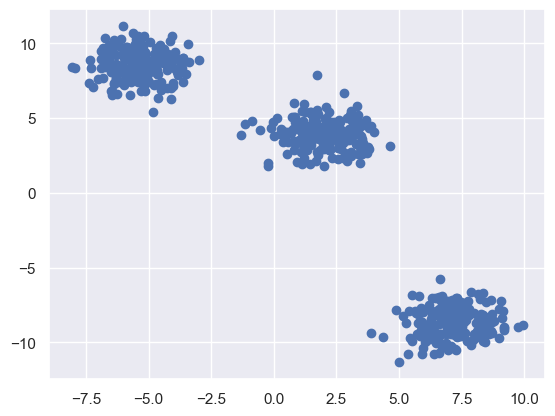

In [91]:
X,y = datasets.make_blobs(n_samples=[200,200,200], n_features=2, random_state=215211)
plt.scatter(X[:,0], X[:,1])

#Implement MySpectralClustering class

In [92]:
from sklearn.neighbors import kneighbors_graph
from scipy import sparse
from scipy import linalg
from sklearn.cluster import KMeans
class MySpectralClustering:
    def __init__(self, n_cluster = 3, random_state = None, n_neighbor = 10):
        self.k = n_cluster
        self.seed = random_state
        self.nneighbor = n_neighbor
        super.__init__
    #private generate laplace matrix
    def __generateGraphLaplace(self,X):
        #find connect use kneighbors algorithm
        connectivity = kneighbors_graph(X = X, n_neighbors=self.nneighbor)
        #build adjacenty Matrix
        adjacentyMatrix = (1/2)*(connectivity+ connectivity.T)
        #build laplace matrix
        graphLaplaceS = sparse.csgraph.laplacian(csgraph=adjacentyMatrix, normed=False)  
        graphLaplace = graphLaplaceS.toarray()
        self.laplaceMatrix = graphLaplace
    def __getEigenVectorMatrix(self):
        #ucalcute eigenvalues and eigenvectors crosssponding to
        eigenValues, eigenVectors = linalg.eig(self.laplaceMatrix)
        eigenValues = np.real(eigenValues)
        eigenVectors = np.real(eigenVectors)

        #sort eigenvalues to get spectral
        eigenValuesSortIndices = np.argsort(eigenValues)
        # get k eigenValues first of spectral
        Indices = eigenValuesSortIndices[:self.k]
        return eigenVectors[:, Indices.squeeze()]
    def fit(self, X):
        self.__generateGraphLaplace(X)
        self.EigenVectorsMatrix = self.__getEigenVectorMatrix()
        #to avoid  error when data just has 1 fetures
        if (self.k == 1):
            self.EigenVectorsMatrix = self.EigenVectorsMatrix.reshape(1,-1)
        #use kmeaans to cluster on k eigenvector first of spetral eigenvector
        kMeans = KMeans(n_clusters=self.k, random_state=self.seed).fit(self.EigenVectorsMatrix)
        self.labels_ = kMeans.labels_
        self.inertia_ = kMeans.inertia_
        return self


ElbowFunction to determine the appropriate number of clusters

In [93]:
#this functin to plot inertia score in range(start, end). this is called elbow method to find k rational 
def ElbowFigShow(X, start:int = 2, end:int = 3, Random_state = 1109):
    inertias = []
    k_candidates = range(start,end+1)
    for k in k_candidates:
        spectralCluster = MySpectralClustering(n_cluster=k, random_state= Random_state).fit(X)
        inertias.append(spectralCluster.inertia_)
    sns.scatterplot(x=k_candidates, y=inertias)
    sns.lineplot(x=k_candidates, y=inertias)

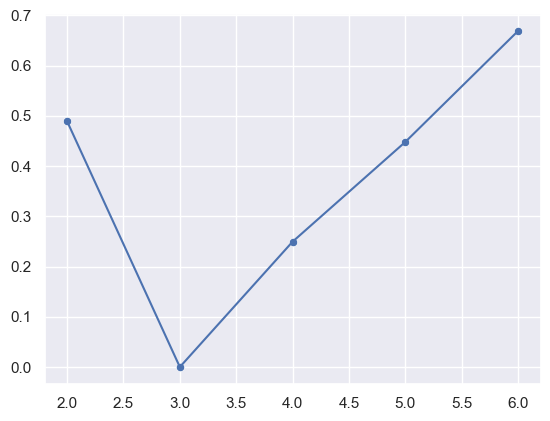

In [94]:
ElbowFigShow(X, 2,6)

In [95]:
spectralCluster = MySpectralClustering(n_cluster=3).fit(X)

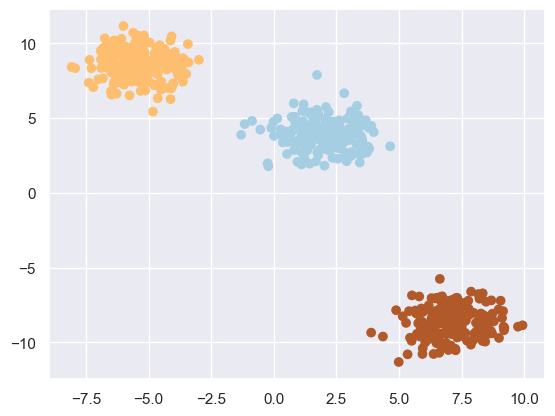

In [96]:
plt.scatter(X[:,0],X[:,1], c=spectralCluster.labels_, cmap=mplt.colors.ListedColormap(colors))
plt.show()

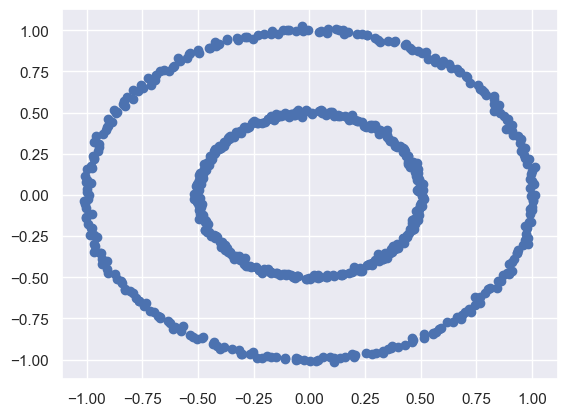

In [97]:
Xc, yc = datasets.make_circles(n_samples=600, noise=0.01, random_state=21521109, factor=0.5)
plt.scatter(Xc[:,0], Xc[:,1])


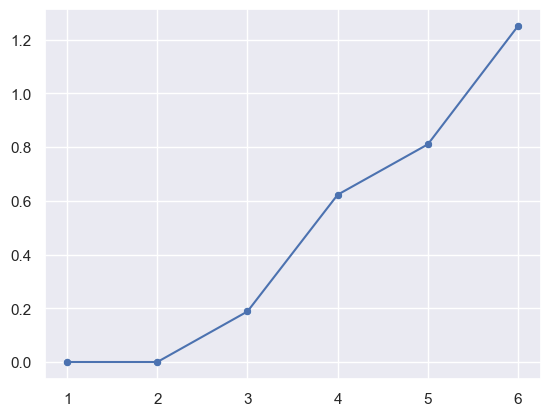

In [98]:
ElbowFigShow(Xc,1, 6)

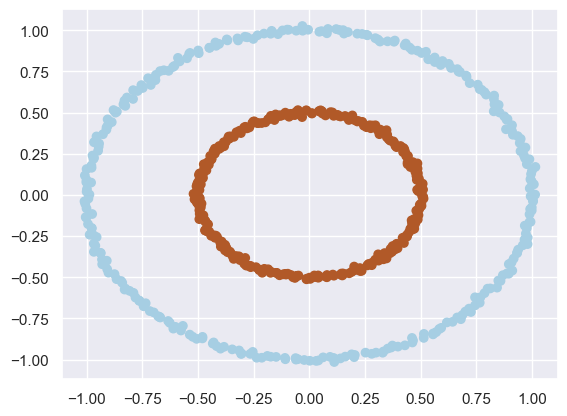

In [99]:
spectralClusterCircle = MySpectralClustering(n_cluster=2).fit(Xc)
plt.scatter(Xc[:,0],Xc[:,1], c=spectralClusterCircle.labels_, cmap=mplt.colors.ListedColormap(colors))
plt.show()

# ***Visualize eigenvector of laplacion matrix***
---
Our kmeans algorithm will fit on eigenvector of laplacion matrix below instead of above.

So, it't easy to find a perfect cluster with kmeans, because they almost converge to points

(600, 2)


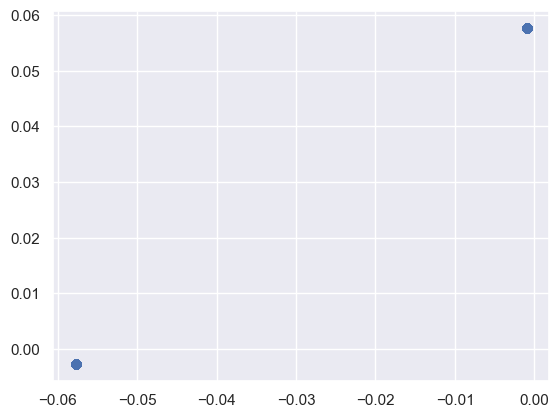

In [100]:
print(spectralClusterCircle.EigenVectorsMatrix.shape)
EigenMatrix = spectralClusterCircle.EigenVectorsMatrix
plt.scatter(EigenMatrix[:,0],EigenMatrix[:,1])
plt.show()

Try cluster this circle dataset into three clusters

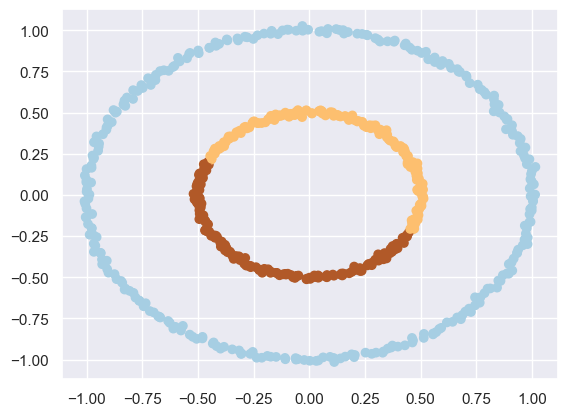

In [101]:
spectralClusterCircle = MySpectralClustering(n_cluster=3).fit(Xc)
plt.scatter(Xc[:,0],Xc[:,1], c=spectralClusterCircle.labels_, cmap=mplt.colors.ListedColormap(colors))
plt.show()

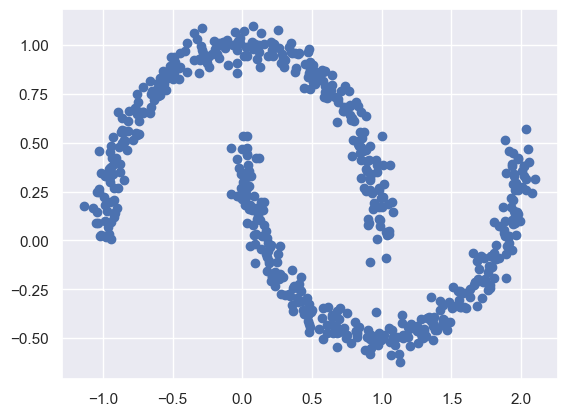

In [102]:
Xm, ym = datasets.make_moons(n_samples=600, noise = 0.05)
plt.scatter(Xm[:,0], Xm[:,1])


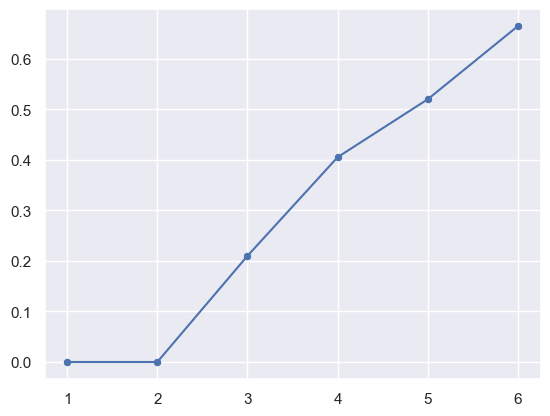

In [103]:
ElbowFigShow(Xm, 1, 6)

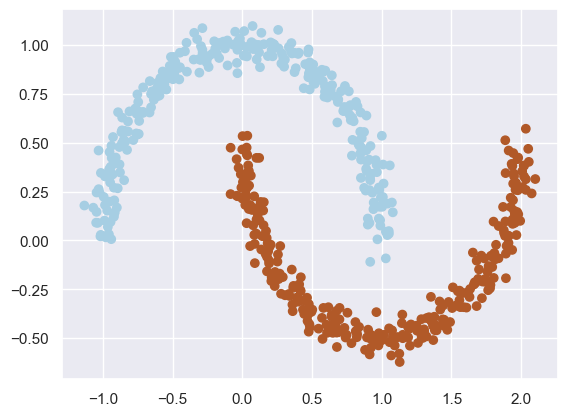

In [104]:
spectralClusterMoon = MySpectralClustering(n_cluster=2).fit(Xm)
plt.scatter(Xm[:,0],Xm[:,1], c=spectralClusterMoon.labels_, cmap=mplt.colors.ListedColormap(colors))

# ***Auto k algorithm***
----
From the theory presented above, we implement the spectralclustering algorithm to automatically determine how many clusters

Class AutoSpectralClustering will be take in threshold parameter instead of n_cluster, threashold is a very small real number. 

The smaller threshold, the less clusters will be determined 

In [105]:
from sklearn.neighbors import kneighbors_graph
from scipy import sparse
from scipy import linalg
from sklearn.cluster import KMeans
class AutoSpectralClustering:
    def __init__(self,threshold = 1e-2, random_state = None, n_neighbor = 10):
        self.seed = random_state
        self.nneighbor = n_neighbor
        self.threshold = threshold
        super.__init__
    #private generate laplace matrix
    def __generateGraphLaplace(self,X):
        #find connect use kneighbors algorithm
        connectivity = kneighbors_graph(X = X, n_neighbors=self.nneighbor)
        #build adjacenty Matrix
        adjacentyMatrix = (1/2)*(connectivity+ connectivity.T)
        #build laplace matrix
        graphLaplaceS = sparse.csgraph.laplacian(csgraph=adjacentyMatrix, normed=False)  
        graphLaplace = graphLaplaceS.toarray()
        self.laplaceMatrix = graphLaplace
    def __getEigenVectorMatrix(self):
        #ucalcute eigenvalues and eigenvectors crosssponding to
        eigenValues, eigenVectors = linalg.eig(self.laplaceMatrix)
        eigenValues = np.real(eigenValues)
        eigenVectors = np.real(eigenVectors)
        #get eigenvalue Fiedler
        zeroEigenValueIndex = np.argwhere(abs(eigenValues) < self.threshold)
        self.k, _ = zeroEigenValueIndex.shape
        #get eigenvector Fiedler crossponding to eigenvalue Fiedler
        return eigenVectors[:, zeroEigenValueIndex.squeeze()]
    def fit(self, X):
        self.__generateGraphLaplace(X)
        EigenVectorsMatrix = self.__getEigenVectorMatrix()
        #to avoid  error when data just has 1 fetures
        if (self.k == 1):
            EigenVectorsMatrix = EigenVectorsMatrix.reshape(1,-1)
        #use kmeaans to cluster on k eigenvector first of spetral eigenvector
        kMeans = KMeans(n_clusters=self.k, random_state=self.seed).fit(EigenVectorsMatrix)
        self.labels_ = kMeans.labels_
        self.inertia_ = kMeans.inertia_
        return self

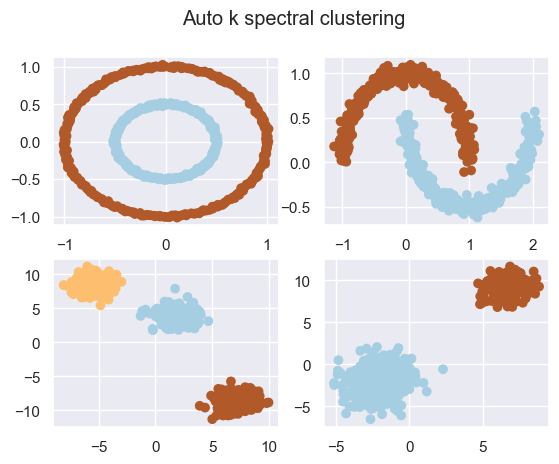

In [106]:
X4,y = datasets.make_blobs(n_samples=[200,250,100,150], n_features=2, random_state=21521109)
ASpectralCircle = AutoSpectralClustering().fit(Xc)
ASpectralBlobs = AutoSpectralClustering().fit(X)
ASpectralMoon = AutoSpectralClustering(threshold=1e-3).fit(Xm)
ASpectralBlobs4 = AutoSpectralClustering().fit(X4)

plt.subplot(2,2,1)
plt.scatter(Xc[:,0],Xc[:,1], c=ASpectralCircle.labels_, cmap=mplt.colors.ListedColormap(colors))

plt.subplot(2,2,2)
plt.scatter(Xm[:,0],Xm[:,1], c=ASpectralMoon.labels_, cmap=mplt.colors.ListedColormap(colors))

plt.subplot(2,2,3)
plt.scatter(X[:,0],X[:,1], c=ASpectralBlobs.labels_, cmap=mplt.colors.ListedColormap(colors))

plt.subplot(2,2,4)
plt.scatter(X4[:,0],X4[:,1], c=ASpectralBlobs4.labels_, cmap=mplt.colors.ListedColormap(colors))
plt.suptitle("Auto k spectral clustering")
plt.savefig(fname=f'{SpectralFigName}/AutoKSpectraOn4Datasets.png', dpi=500, transparent=False,bbox_inches='tight')
plt.show()

In [107]:
import os
KmeanFigName = 'KmeansFig'
if (os.path.exists(KmeanFigName) == False):
    os.mkdir(KmeanFigName)

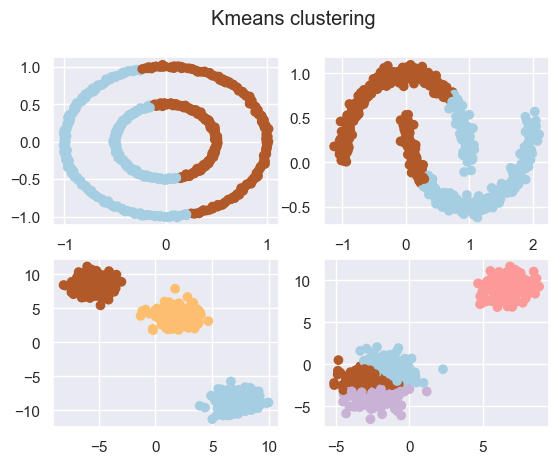

In [108]:
KmeansCircle = KMeans(n_clusters=2).fit(Xc)
KmeansBlobs = KMeans(n_clusters=3).fit(X)
KmeansMoon = KMeans(n_clusters=2).fit(Xm)
KmeansBlobs4 = KMeans(n_clusters=4).fit(X4)

plt.subplot(2,2,1)
plt.scatter(Xc[:,0],Xc[:,1], c=KmeansCircle.labels_, cmap=mplt.colors.ListedColormap(colors))

plt.subplot(2,2,2)
plt.scatter(Xm[:,0],Xm[:,1], c=KmeansMoon.labels_, cmap=mplt.colors.ListedColormap(colors))

plt.subplot(2,2,3)
plt.scatter(X[:,0],X[:,1], c=KmeansBlobs.labels_, cmap=mplt.colors.ListedColormap(colors))

plt.subplot(2,2,4)
plt.scatter(X4[:,0],X4[:,1], c=KmeansBlobs4.labels_, cmap=mplt.colors.ListedColormap(colors))
plt.suptitle("Kmeans clustering")
plt.savefig(fname=f'{KmeanFigName}/KmeansOn4Datasets.png', dpi=500, transparent=False,bbox_inches='tight')
plt.show()

# ***Compare the efficiency and execution time of the algorithms***
-------
Compare on 4 algorithms on 4 datasets

In [109]:
import time
import warnings
from sklearn import cluster, datasets

In [110]:
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 1109
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

In [111]:
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

In [112]:
# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(50,60))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (
        blobs, 
        {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}
    ),
    (no_structure, {})
]

<Figure size 5000x6000 with 0 Axes>

In [113]:
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

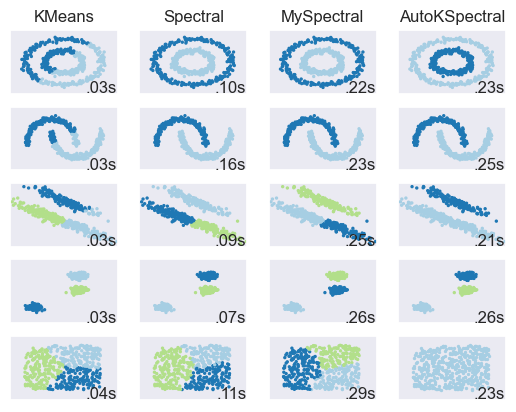

In [114]:
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    kmeans = cluster.KMeans(
        n_clusters=params["n_clusters"]
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    mySpectral = MySpectralClustering(
        n_cluster= params["n_clusters"],
    )
    AutoSpectral = AutoSpectralClustering(
    )
    clustering_algorithms = (
        ("KMeans", kmeans),
        ("Spectral", spectral),
        ("MySpectral", mySpectral),
        ("AutoKSpectral", AutoSpectral)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num )
        if i_dataset == 0:
            plt.title(name, size=12)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            sns.color_palette("Paired").as_hex()
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=2, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=12,
            horizontalalignment="right",
        )
        plot_num += 1
#save it
plt.savefig(fname=f'{SpectralFigName}/Compare.png', dpi=500, transparent=False,bbox_inches='tight')
plt.show()